In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [334]:
col=['ID','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df=pd.read_csv("Desktop/breast-cancer-wisconsin.data")
df.columns=col
df.replace('?',-99999,inplace=True)
np.random.seed(42)
df=df.sample(frac=1,random_state=44)

In [335]:
print(df.head(1).T)

                                266
ID                           320675
Clump_Thickness                   3
Uniformity_of_Cell_Size           3
Uniformity_of_Cell_Shape          5
Marginal_Adhesion                 2
Single_Epithelial_Cell_Size       3
Bare_Nuclei                      10
Bland_Chromatin                   7
Normal_Nucleoli                   1
Mitoses                           1
Class                             4


In [336]:
df=df.drop(['ID'],axis=1)

In [337]:
df.isnull().any().sum()    #not exist any null data
df.dtypes

Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

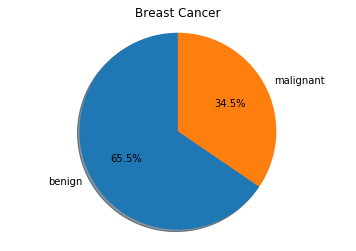

In [338]:
label=['benign','malignant']
df.Class.value_counts()
size=[457,241]

explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Breast Cancer")
plt.show()


In [339]:
X=df.iloc[:,:9]
Y=df.iloc[:,9:10]
xtrain=X.iloc[:(X.shape[0]-140),:]
ytrain=Y.iloc[:Y.shape[0]-140,:]
xtest=X.iloc[X.shape[0]-140:,:]
ytest=Y.iloc[Y.shape[0]-140:,:]
print("The Shape of Train Data",xtrain.shape)
print("The Shape of Label-train Data",ytrain.shape)
print("The Shape of Test Data",xtest.shape)
print("The Shape of Label-test Data",ytest.shape)

The Shape of Train Data (558, 9)
The Shape of Label-train Data (558, 1)
The Shape of Test Data (140, 9)
The Shape of Label-test Data (140, 1)


In [340]:
class KNeighborsClassifier:
    
    def __init__(self):
        pass
    
    def fit(self,X,Y):
        self.xtr=X
        self.xtr=self.xtr.astype(float)
        self.ytr=Y
        self.ytr=self.ytr.astype(float)
        
    def predict(self,EX):
        
        num_test=EX.shape[0]
        ypred=pd.DataFrame()
        ypred=ypred.astype(float)
        EX=EX.astype(float)
        for i in range(num_test):
            distance=[]
            for j in range(self.xtr.shape[0]):
                distance.append(np.sqrt(np.sum(np.abs(self.xtr.iloc[j,:]-EX.iloc[i,:])**2)))
            min_index=np.argmin(distance)
            ypred=ypred.append(self.ytr.iloc[min_index,:])
            
        return ypred
    def score(self,ytest,ypred):
        total=0
        goal=0
        ypred=ypred.astype(float)
        ytest=ytest.astype(float) 
        for i in range(ytest.shape[0]):
            if ytest.iloc[i,0]==ypred.iloc[i,0]:
                goal+=1
            total+=1
        return goal/total
    

In [341]:
knn=KNeighborsClassifier()

In [342]:
knn.fit(xtrain,ytrain)

In [343]:
ypred=knn.predict(xtest)

In [346]:
change={"2":"benign","4":"malignant"}
for i in range(ytest.shape[0]):
    
    str1,str2="",""
    
    if ytest.iloc[i,0]==4:
        str1=change["4"]
    else :
        str1=change["2"]
    
    if ypred.iloc[i,0]==4:
        str2=change["4"]
    else :
        str2=change["2"]
    
    print("The Actual Data is {} and The Predict Data is {}".format(str1,str2))
print("The Accuracy of Model is ",knn.score(ytest,ypred)*100.0,"%")

The Actual Data is malignant and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is malignant and The Predict Data is malignant
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is malignant and The Predict Data is malignant
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data is benign and The Predict Data is benign
The Actual Data 